In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import torch
import cv2
import sys
import json
from PIL import Image
from tqdm import tqdm

# %matplotlib inline
%config InlineBackend.figure_format = 'retina'
print(f"Pytorch Version:[{torch.__version__}]")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"device:[{device}]")

Pytorch Version:[1.4.0]
device:[cuda:0]


In [3]:
os.getcwd()

'/opt/ml/analysis'

In [4]:
batch_1 = "/opt/ml/input/data/batch_01_vt"
batch_2 = "/opt/ml/input/data/batch_02_vt"
batch_3 = "/opt/ml/input/data/batch_03"

In [5]:
batch_1_images = glob(os.path.join(batch_1, "*"))
batch_2_images = glob(os.path.join(batch_2, "*"))
batch_3_images = glob(os.path.join(batch_3, "*"))

len(batch_1_images), len(batch_2_images), len(batch_3_images)

(1194, 1959, 959)

### 데이터 시각화

In [6]:
def show_images(path, N=7):
    fig, ax = plt.subplots(figsize=(20, 20), ncols=N)
    for i, p in enumerate(path):
        if i == N:
            break
        img = cv2.imread(p)
        ax[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

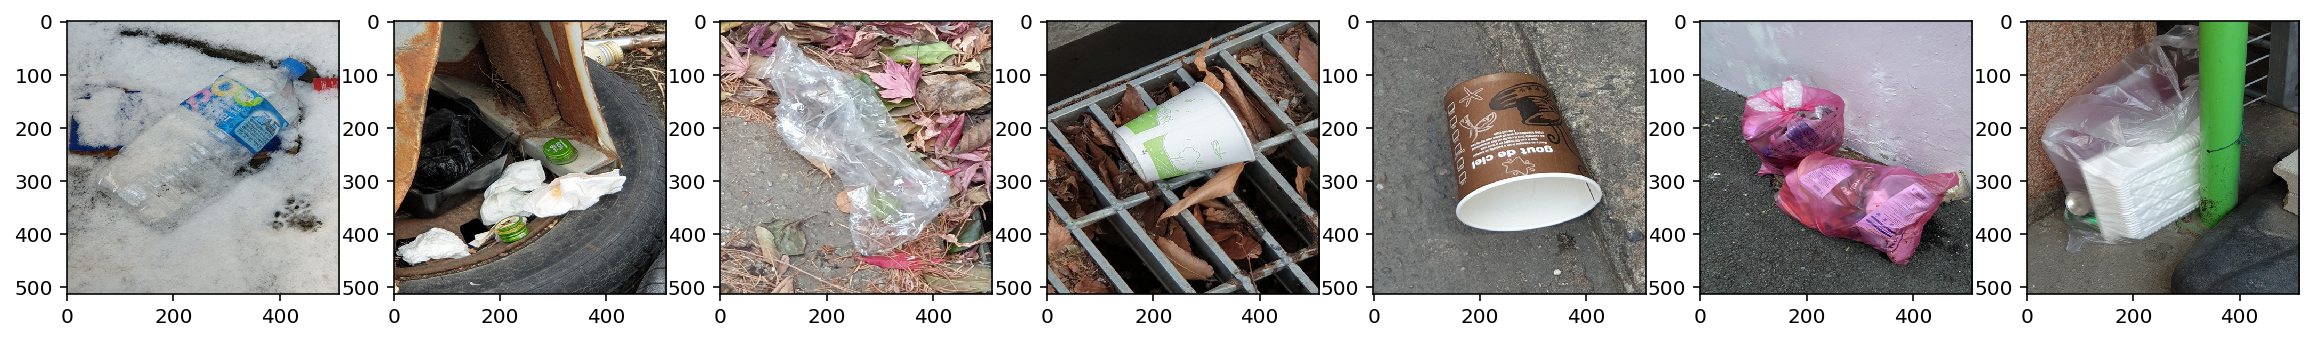

In [7]:
show_images(batch_1_images[:7])

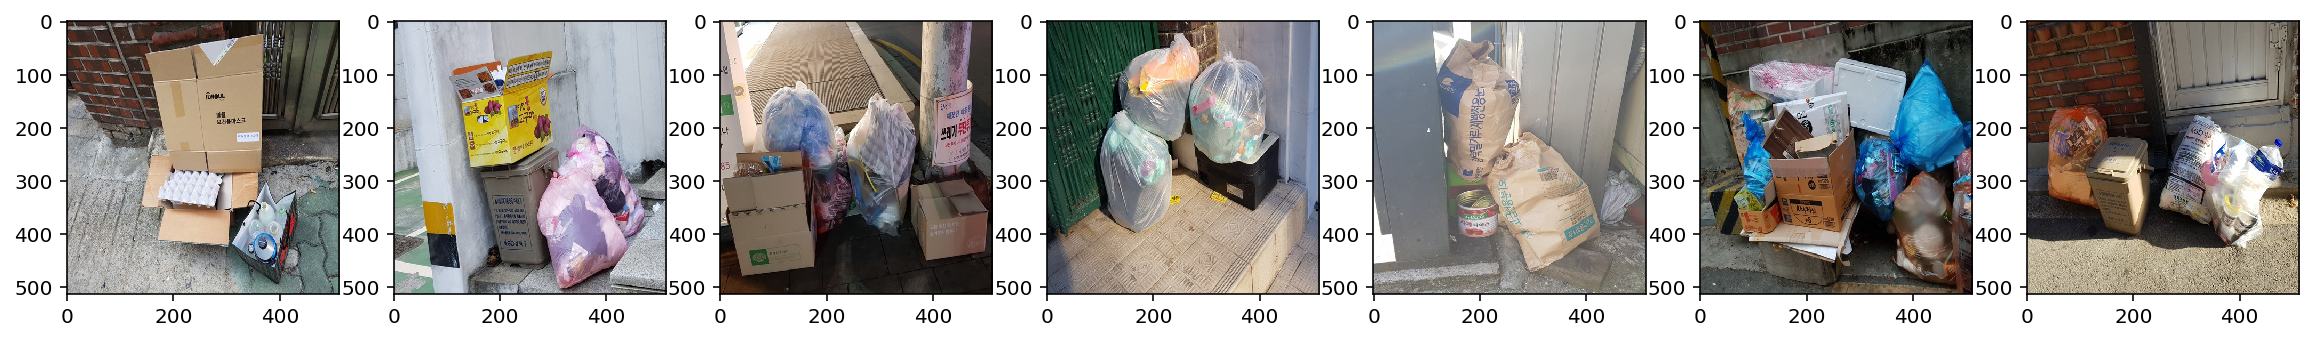

In [8]:
show_images(batch_2_images[:7])

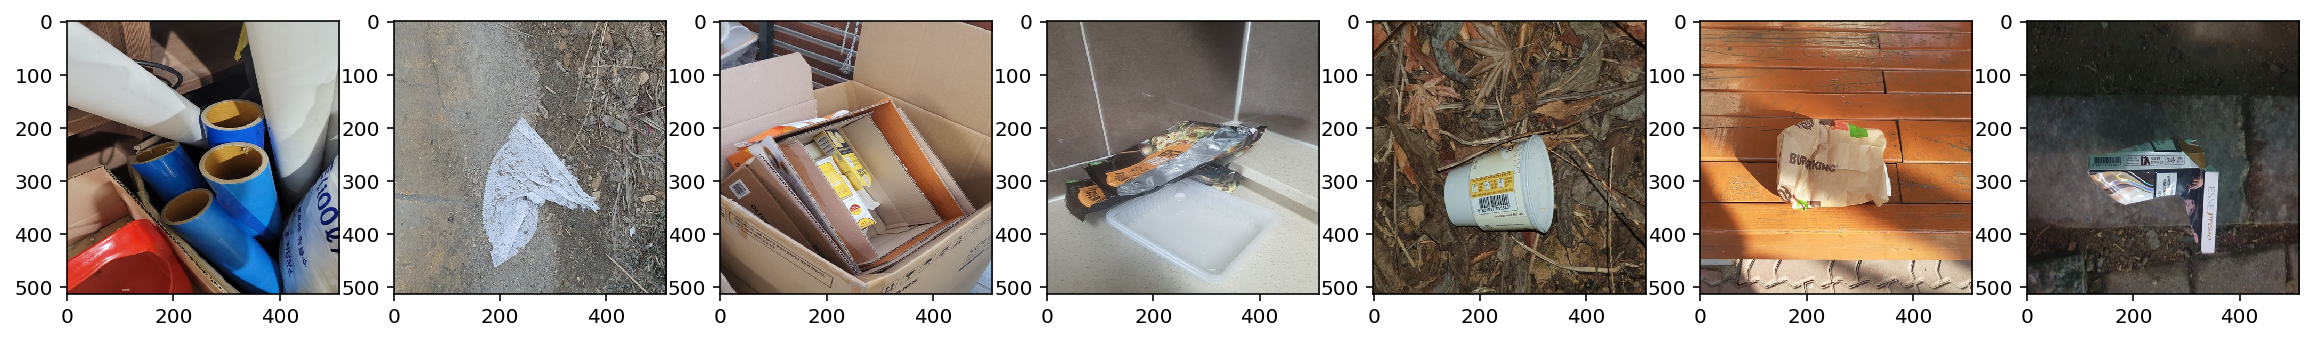

In [9]:
show_images(batch_3_images[:7])

In [10]:
train_all_json = "/opt/ml/input/data/train_all.json"
train_json = "/opt/ml/input/data/train.json"
val_json = "/opt/ml/input/data/val.json"

In [11]:
with open(train_all_json, 'r') as j:
     train_all_list = json.loads(j.read())
with open(train_json, 'r') as j:
     train_list = json.loads(j.read())
with open(val_json, 'r') as j:
     val_list = json.loads(j.read())

### Category class 분포

In [12]:
categorys = [i['category_id'] for i in train_all_list["annotations"]]
from collections import defaultdict
category_ids = defaultdict(int)
for c in categorys:
    category_ids[c] += 1
category_ids

defaultdict(int,
            {8: 7643,
             6: 3090,
             5: 610,
             1: 2782,
             4: 562,
             2: 9311,
             3: 659,
             7: 1343,
             0: 160,
             10: 177,
             9: 63})

In [20]:
c = pd.DataFrame(category_ids.items(), columns=["category", "count"])
c

category  count
0          8   7643
1          6   3090
2          5    610
3          1   2782
4          4    562
5          2   9311
6          3    659
7          7   1343
8          0    160
9         10    177
10         9     63

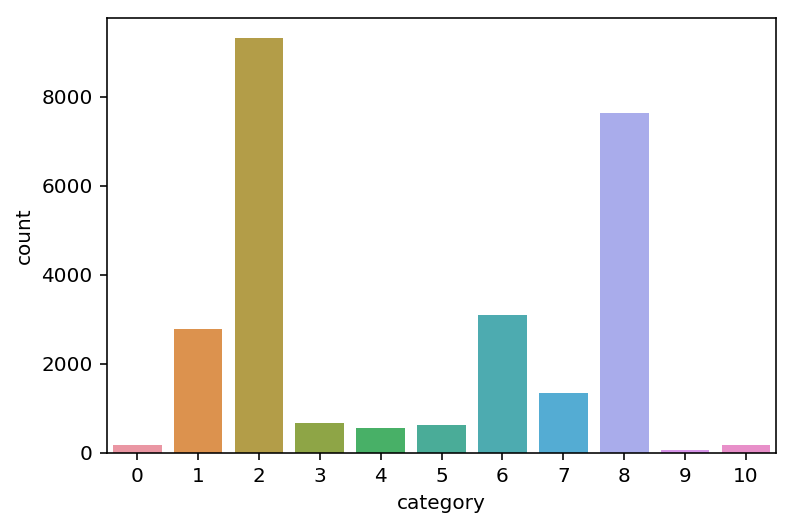

In [28]:
sns.barplot(data=c, x="category", y="count")

### 각 이미지 당 가지고 있는 category 수

In [45]:
image_per_category = defaultdict(int)

for i in range(len(train_all_list["annotations"])):
    image_per_category[train_all_list["annotations"][i]['image_id']] += 1

In [47]:
images = pd.DataFrame(image_per_category.items(), columns=["image", "count"])
images

image  count
0         0     17
1         1     14
2         2      1
3         3      2
4         4      2
...     ...    ...
3267   3267      7
3268   3268     14
3269   3269      4
3270   3270      8
3271   3271      1

[3272 rows x 2 columns]

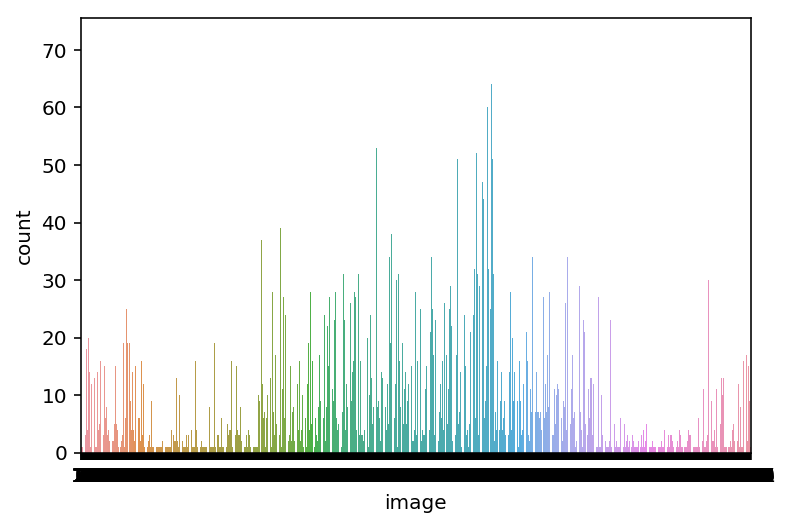

In [48]:
sns.barplot(data=images, x="image", y="count")